✅ Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Shape: (768, 9)
✅ clean_train.csv and clean_test.csv created inside data/processed/
🎯 Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59    

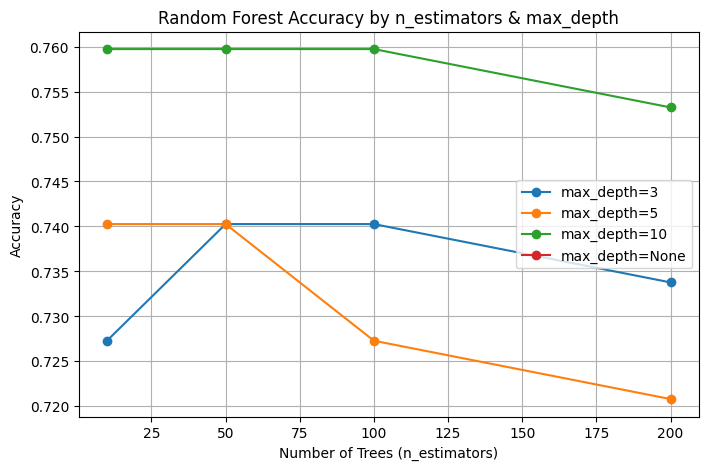

In [ ]:
# ===============================================
# 🧬 Diabetes Dataset Setup for Random Forest
# ===============================================

import os
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print(df.head())
print("Shape:", df.shape)


os.makedirs("data/processed", exist_ok=True)


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Outcome"])


train_data.to_csv("data/processed/clean_train.csv", index=False)
test_data.to_csv("data/processed/clean_test.csv", index=False)

print("✅ clean_train.csv and clean_test.csv created inside data/processed/")
=




train_data = pd.read_csv("data/processed/clean_train.csv")
test_data = pd.read_csv("data/processed/clean_test.csv")


X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]
X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

t
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,    
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


n_estimators = [10, 50, 100, 200]
max_depths = [3, 5, 10, None]
results = []

for n in n_estimators:
    for depth in max_depths:
        model = RandomForestClassifier(
            n_estimators=n, max_depth=depth, random_state=42
        )
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results.append((n, depth, acc))

res_df = pd.DataFrame(results, columns=["n_estimators", "max_depth", "accuracy"])


plt.figure(figsize=(8,5))
for depth in max_depths:
    subset = res_df[res_df["max_depth"] == depth]
    plt.plot(subset["n_estimators"], subset["accuracy"], marker='o', label=f"max_depth={depth}")

plt.title("Random Forest Accuracy by n_estimators & max_depth")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()




